<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load the adults income dataset and print first five observations**

In [2]:
# type your code here
df = pd.read_csv('adult_income.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [5]:
df.sex = df.sex.astype(object, copy = False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df.groupby('sex').age.mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

The average age of males is 39.4 and that of females is 36.8. Hence the avg. age of females is less than that of males.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df['capital.gain'].quantile(0.95)

5013.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

- Qualification of most of the individuals is **HS-grad**

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.groupby('workclass').age.median().sort_values()

workclass
Never-worked        18
?                   35
Private             35
State-gov           39
Local-gov           41
Federal-gov         43
Self-emp-not-inc    44
Self-emp-inc        45
Without-pay         57
Name: age, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
print('Mean of capital gain is', round(df['capital.gain'].mean(), 4)) 
print('Trimmed Mean of capital gain is', st.trim_mean(df['capital.gain'], proportiontocut = 0.005))

Mean of capital gain is 1077.6488
Trimmed Mean of capital gain is 591.6421503241617


- More than 90% of data in capital gain is outliers (0 and 99999). Therefore, the mean of capital gain data is heavily affected by presence of outliers and not very accurate. All the outliers should be removed before calculating the mean

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df[df.race == 'Asian-Pac-Islander'].race.value_counts()*100/df.race.count()

Asian-Pac-Islander    3.190934
Name: race, dtype: float64

- Percentage of Asian-Pac-Islander = **3.19**

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df.groupby('occupation').var()['hours.per.week'].sort_values(ascending = False)

occupation
Farming-fishing      299.987814
Priv-house-serv      261.939597
?                    225.317543
Armed-Forces         198.000000
Sales                175.202547
Transport-moving     161.833503
Other-service        161.442544
Prof-specialty       157.159186
Protective-serv      152.072728
Exec-managerial      123.412395
Tech-support         112.001859
Handlers-cleaners    111.946104
Adm-clerical          91.964888
Craft-repair          81.939394
Machine-op-inspct     57.648955
Name: hours.per.week, dtype: float64

- **Farming-fishing** has more variability in the working hours

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
print("Range of middle 50% of working hours per week is", df['hours.per.week'].quantile(0.75) - df['hours.per.week'].quantile(0.25))

Range of middle 50% of working hours per week is 5.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df.describe().loc["std"]

age                   13.640433
fnlwgt            105549.977697
education.num          2.572720
capital.gain        7385.292085
capital.loss         402.960219
hours.per.week        12.358681
Name: std, dtype: float64

- Based on variability we can ignore **'education.num'** since the standard deviation is near to zero. Thus this variable does not add much value to the analysis and can be further removed from the study

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
workhours_group = df.groupby('workclass')['hours.per.week']
{k: round(st.variation(v.values), 3) for k, v in workhours_group.groups.items()}

{'?': 0.557,
 'Federal-gov': 0.597,
 'Local-gov': 0.599,
 'Never-worked': 0.386,
 'Private': 0.566,
 'Self-emp-inc': 0.715,
 'Self-emp-not-inc': 0.613,
 'State-gov': 0.575,
 'Without-pay': 0.481}

- **Interpretaion:** Percentage of variation in work hours is highest (i.e. more inconsistent) for **'Self-emp-inc'**, and second highest for 'Self-emp-not-inc'

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
def cat_freq(data, col):
    plt.figure(figsize = (12, 5))
    data[col].value_counts().head(17).plot(kind = 'bar')
    y = np.array(data[col].value_counts())
    xpos = np.array(range(0, 17))
    plt.text(xpos[0] - 0.2, y[0], y[0])
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.show()

In [18]:
df.describe(include = 'object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,0,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


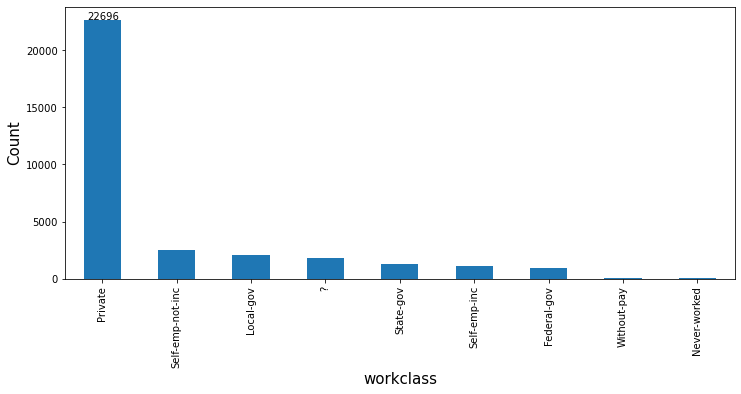

In [19]:
cat_freq(df, 'workclass')

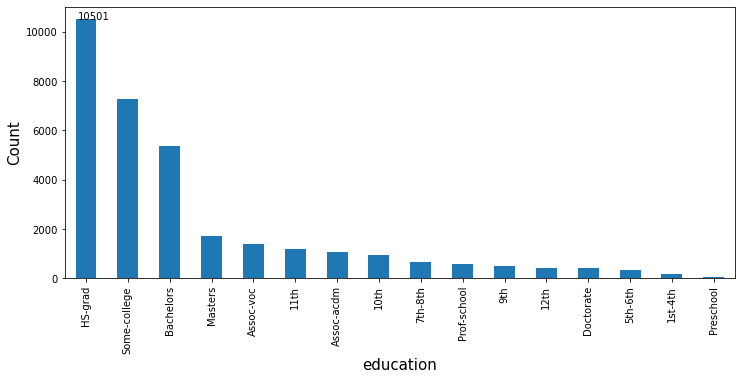

In [20]:
cat_freq(df, 'education')

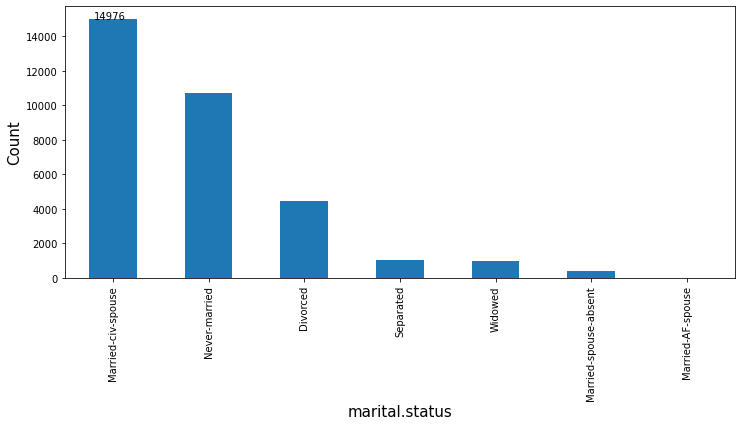

In [21]:
cat_freq(df, 'marital.status')

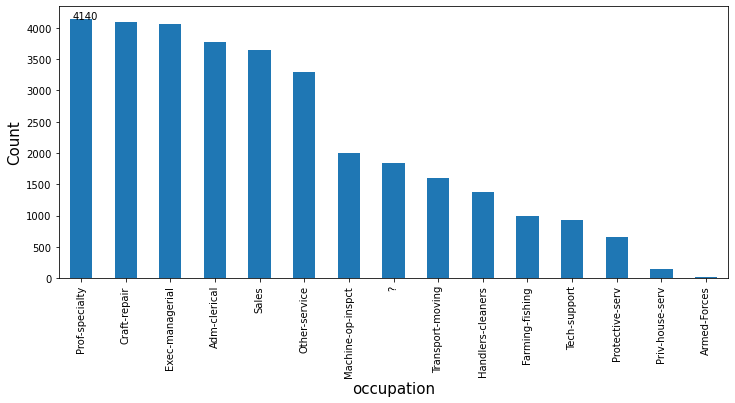

In [22]:
cat_freq(df, 'occupation')

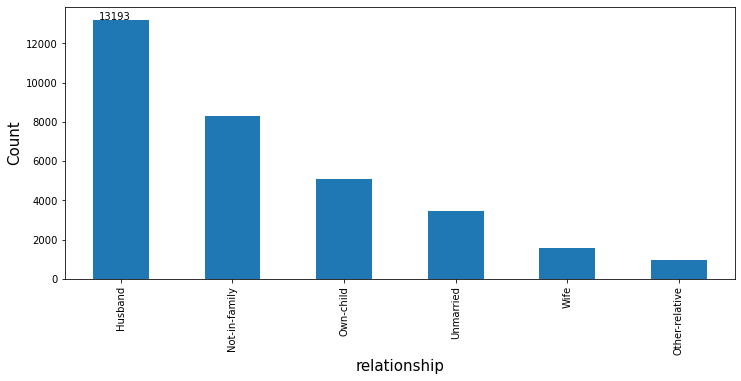

In [23]:
cat_freq(df, 'relationship')

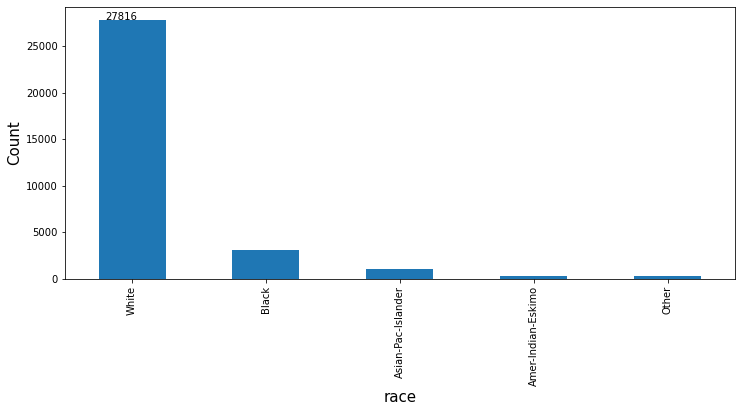

In [24]:
cat_freq(df, 'race')

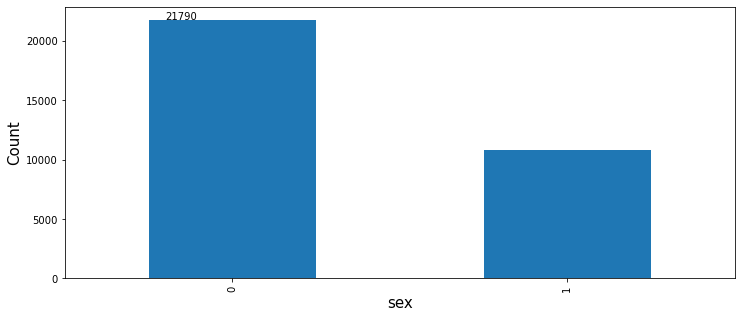

In [25]:
cat_freq(df, 'sex')

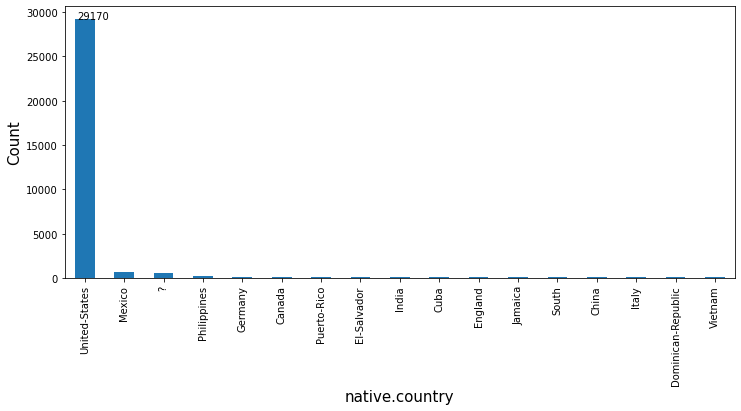

In [26]:
cat_freq(df, 'native.country')

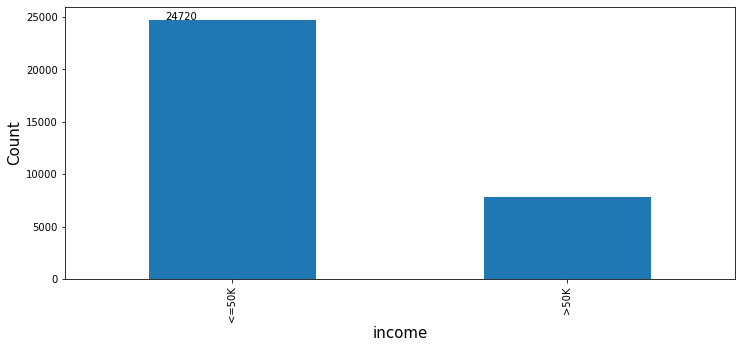

In [27]:
cat_freq(df, 'income')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.skew().sort_values(ascending = True)

education.num     -0.311676
hours.per.week     0.222241
age                0.558743
sex                0.719293
fnlwgt             1.446980
capital.loss       4.594629
capital.gain      11.953848
dtype: float64

- A variable is normally distributed if its adjusted Fisher-Pearson Coefficient of Skewness is zero. Therefore, the variables **'hours.per.week'** and **'age'** can be considered close to normally distributed.
- Since 'education.num' and 'sex' are encoded values, we can ignore the distribution of these variables

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Mode = Private


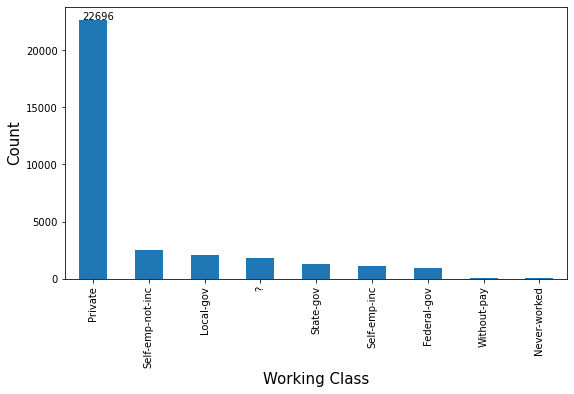

In [29]:
print("Mode =", df['workclass'].mode()[0])
plt.figure(figsize = (9, 5))
df['workclass'].value_counts().plot(kind = 'bar')
y = np.array(df['workclass'].value_counts())
xpos = np.array(range(0, 10))
plt.text(xpos[0] - 0.2, y[0], y[0])
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Working Class', fontsize = 15)
plt.show()

- Working class for most of the population in the data falls under **'Private'**

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Mode =  40


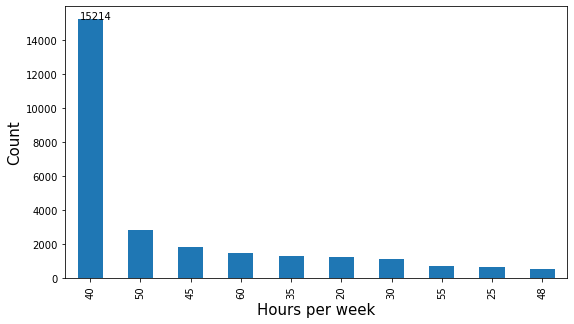

In [30]:
print("Mode = ", df['hours.per.week'].mode()[0])
plt.figure(figsize = (9, 5))
df['hours.per.week'].value_counts().head(10).plot(kind = 'bar')
y = np.array(df['hours.per.week'].value_counts())
xpos = np.array(range(0, 11))
plt.text(xpos[0] - 0.2, y[0], y[0])
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Hours per week', fontsize = 15)
plt.show()

- Most of the individuals work 40 hours per week

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df.skew().sort_values()

education.num     -0.311676
hours.per.week     0.222241
age                0.558743
sex                0.719293
fnlwgt             1.446980
capital.loss       4.594629
capital.gain      11.953848
dtype: float64

- From the above values, only **'education.num'** is a negatively skewed feature. It is supported by the below plot which shows the distribution of the data is elongated on the right side. Since this is an encoded variable, we can actually ignore the distribution of 'education.num'

<Figure size 864x360 with 0 Axes>

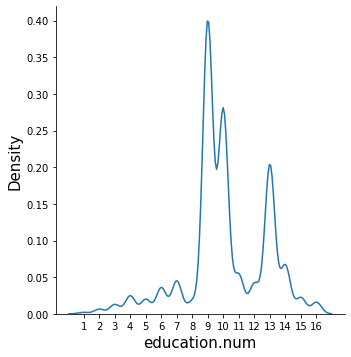

In [32]:
plt.figure(figsize = (12, 5))
sns.displot(df['education.num'], kind = 'kde')
plt.ylabel('Density', fontsize = 15)
plt.xlabel('education.num', fontsize = 15)
labels = range(1, 17)
plt.xticks(labels)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
df.kurt().sort_values()

sex                -1.482709
age                -0.166127
education.num       0.623444
hours.per.week      2.916782
fnlwgt              6.218811
capital.loss       20.376802
capital.gain      154.799438
dtype: float64

**Interpretation:**
- 'Age' is platykurtic since it has negative kurtosis value. This means it has more dispersed values with less extreme values at the tails
- 'education.num' can be said to be mesokurtic or normally distributed since it has near zero kurtosis
- 'hours.per.week', 'fnlwgt', 'capital.loss', 'capital.gain' are all leptokurtic as they have kurtosis > 0. The high kurtosis value of 'capital.gain' and 'capital.loss' means they have large number of extreme values at the tails 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

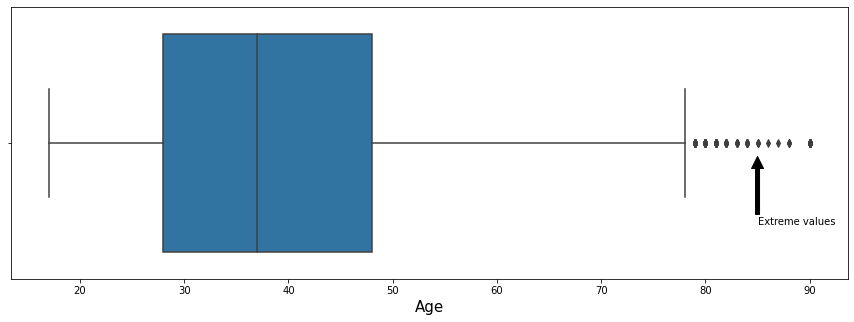

In [34]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'age', data = df)
plt.xlabel('Age', fontsize = 15)
plt.annotate('Extreme values', xy = (85, 0.05), xytext = (85, 0.3), arrowprops = {'facecolor': 'black'})
plt.show()

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Correlation of age with working hours of a person is 0.06931085288793035


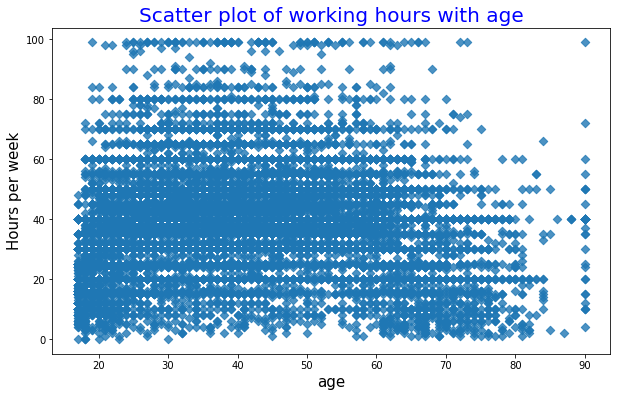

In [35]:
print('Correlation of age with working hours of a person is', df['age'].corr(df['hours.per.week'], method = 'pearson'))
plt.figure(figsize = (10, 6))
plt.scatter(x = 'age', y = 'hours.per.week', data = df, marker = 'D', alpha = 0.8)
plt.xlabel('age', fontsize = 15)
plt.ylabel('Hours per week', fontsize = 15)
plt.title('Scatter plot of working hours with age', fontsize = 20, fontdict = {'color': 'blue'})
plt.show()

- Correlation of age with working hours of a person is 0.06931. Since correlation value is close to zero, we can say there is no correlation between age and working hours

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

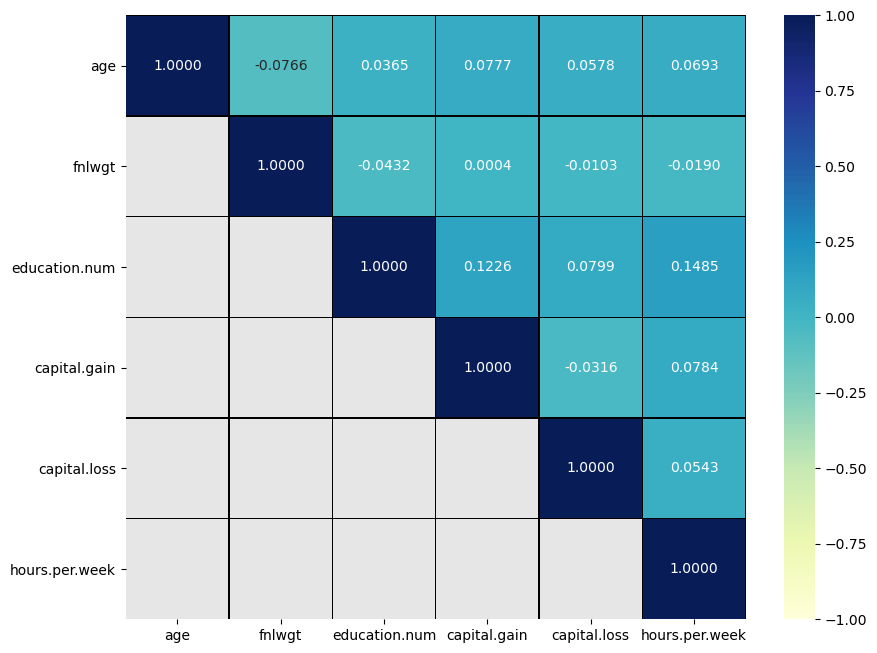

In [48]:
corr_matrix = df.corr(method = 'pearson')
corr_ut = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool))
plt.figure(figsize = (10, 8), dpi = 100)
sns.heatmap(corr_ut, annot = True, cmap = 'YlGnBu', linewidths = 0.1, linecolor = 'black', vmin = -1, vmax = 1, fmt = '.4f')
plt.grid(b = False)
plt.gca().patch.set_facecolor('0.9')